In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import scipy.sparse as spsp
import scipy.sparse.linalg as spsplin


## PARTIE 1: (GMRES)

### Question 1.1:  FONCTION ARNOLDI

Programmons la fonction `Arnoldi(A, V, H)` qui renvoie les matrics $V_p \in M_{n,p+1}(\mathbb{R})$ et $H_p \in M_{p+1,p}(\mathbb{R})$.
On rappelle que nous avons les relations suivantes:
$$
\begin{cases}
\omega_{p} = A v_{p-1} - \sum_{j=1}^{p-1} < Av_{p-1}, v_j> v_j \\
v_p = \frac{\omega_p}{\|\omega_p\|} \\
Av_{p-1} = \| \omega_p \| v_p + \sum_{j=1}^{p-1} < Av_{p-1}, v_j> v_j  = h_{p-1,p} v_p + \sum_{j=1}^{p-1} h_{j,p-1} v_j \\
\end{cases}
$$ 

In [2]:
def Arnoldi(A, V, H) :
    n,p = V.shape[0], V.shape[1]
    Vp = np.zeros((n,p+1))
    Hp = np.zeros((p+1,p))
    Vp[:,:p] = V[:, :]
    Hp[:p,:p-1] = H[:, :]


    Av = A @ V[:,-1]
    wp = Av.copy()

    for j in range(p):
        Hp[j,-1] = Av @ V[:,j]
        wp -= Hp[j,-1] * V[:,j]

        norm_wp = np.linalg.norm(wp)
        Hp[-1, -1] = norm_wp
        vp = wp / norm_wp
        Vp[:,-1] = vp
        
    return Vp, Hp



### Question 1.2: FONCTION GMRES

Programmons la fonction `gmres(A,b,xexact)` ui renvoie la solution $x$ du système lineaire obtenue par l'algorithme GMRES, ainsi que la liste des erreurs ralatives $\frac{\|x_exact - x_k\|}{\|x_exact\|}$, et la liste de la noeme des residus (relatifs) $\frac{\|r_k\|}{\|r_0\|}$.

On rappelle l'algorithme GMRES:
```{python}
    x0 donné
    r0 = b − Ax0 ,
    v0 = r0 / kr0 k , V0 = [v0 ], Ĥ−1 = []
    Tant que condition non satisfaite
        calcul de Vp+1 ,Ĥp à partir de Vp ,Ĥp−1
        Qp Rp = Ĥp
        (Rp )06i,j6p y = kr0 k (QTp e0 )06j6p
        xp+1 = x0 + Vp y

```

In [3]:
def gmres(A, b, xexact):
  
    res = []
    err = []
    n = A.shape[0]
    V = np.zeros((n,1))
    V[:, 0] = b/np.linalg.norm(b)
    H = np.zeros((1,0)) 
    
    res_norm0 = np.linalg.norm(b)
    res_norm = 1
    tol = 1e-8
    itmax = 100
    it = 0
    while res_norm > tol and it < itmax:
        it += 1
        V,H = Arnoldi(A,V,H)
        Q, R = sp.linalg.qr(H)
        
        y = np.linalg.solve( R[:-1, :] , res_norm0*Q[0,:-1] )
        X = V[:,:-1] @ y
        
        err_norm = np.linalg.norm(xexact - X)/np.linalg.norm(xexact)
        err.append(err_norm)
        
        res_norm = np.linalg.norm(b - A @ X)/res_norm0
        res.append(res_norm)

    return X, err, res

### Queston 1.3: 
Testons le programme sur la matrice de donnnees et affichons les resultats:


In [4]:
n = 250
A = np.diag(2*np.ones(n)) + 0.5 * np.random.rand(n, n)/np.sqrt(n)
b = np.random.rand(n) 
xexact = np.linalg.solve(A,b)

## On affiche les 5 premiers éléments de chaque vecteur et de la matrice

print("affichage de la matrice A\n")
print("A = \n", A[:5,:5]) # affichage des 5 premières lignes et colonnes
print()

print("affichage du vecteur b\n")
print("b = \n", b[:5]) # affichage des 5 premiers éléments
print("\n")

print("affichage de la solution exacte\n")
print("xexact = \n", xexact[:5]) # affichage des 5 premiers éléments
print("\n")


affichage de la matrice A

A = 
 [[2.02633797e+00 2.40034104e-02 1.43343509e-02 2.16714206e-02
  1.06776832e-02]
 [7.68706986e-03 2.01830433e+00 1.72495961e-02 2.16141875e-03
  4.71113393e-04]
 [2.59522949e-02 1.64536749e-02 2.02623817e+00 1.53000600e-02
  2.11085407e-02]
 [1.72357474e-02 1.94659601e-02 1.91796847e-02 2.00852801e+00
  1.27350769e-02]
 [1.92820650e-03 1.48245580e-02 2.17621216e-03 7.08553203e-04
  2.02280896e+00]]

affichage du vecteur b

b = 
 [0.5842794  0.3386295  0.18715418 0.18055149 0.45458187]


affichage de la solution exacte

xexact = 
 [ 0.10359842  0.00356583 -0.06866586 -0.08464364  0.04823652]




determination de solution approchee ERREUR et RESIDU par la methode GMRES

In [5]:
X, errGMRES, resGMRES = gmres(A, b, xexact)
print("X = ", X[:5])
print("\n")
print("err = ", errGMRES[:5])
print("\n")
print("res = ", resGMRES[:5])

X =  [ 0.10359842  0.00356583 -0.06866586 -0.08464364  0.04823652]


err =  [0.5432865633399286, 0.03905526143351605, 0.0028247598339807044, 0.0002036901266276356, 1.3839494845472101e-05]


res =  [0.3090651840644455, 0.021432500000787683, 0.0015538900466021955, 0.000112134979035185, 7.642765925629265e-06]


TRACEE DES GRAPHIQUES

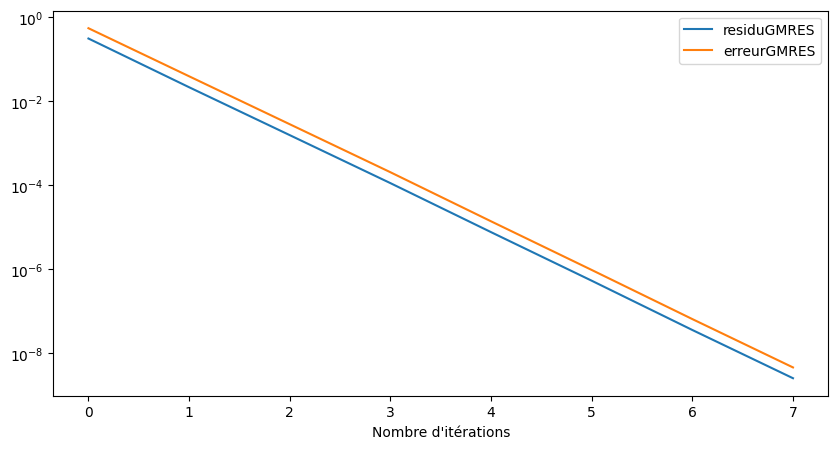

In [6]:
##afficher les courbes résidu et erreur echelle log
fig = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(resGMRES, label="residuGMRES")
plt.plot(errGMRES, label="erreurGMRES")
plt.xlabel("Nombre d'itérations")
plt.yscale('log')

plt.legend()
plt.show()



## PARTIE 2: (Gradient conjugué)

### Question 5:
definition de la fonction gradiant conjugues permettant de retourner la soluiton x, la liste des erreurs (relatifs) et celle des residues (relatifs)

In [7]:
def gradient_conjugue(AB, ab, xexact):
    A = AB.copy()
    b = ab.copy()
    n = AB.shape[0]
    xp = np.zeros(n)
    rp = b - A @ xp
    dp = rp.copy()
    res = []
    err = []
    resnorm0 = np.linalg.norm(rp)
    resnorm = 1
    tol = 1e-6
    itmax = 100
    it = 0
    while resnorm > tol and it < itmax:
        it += 1

        Adp = A @ dp
        sp= (rp @ rp) / (Adp @ dp)
        xp += sp * dp
        rp1 = rp - sp*Adp
        betap = (rp1 @ rp1) / (rp @ rp)
        dp1 = rp1 + betap*dp
        
        rp = rp1
        dp = dp1

        errnorm = np.linalg.norm(xexact - xp)/np.linalg.norm(xexact)
        err.append(errnorm)

        resnorm = np.linalg.norm(b - A @ xp)/resnorm0
        res.append(resnorm)
        
    return xp, err, res

### Question 6:
Testons le programme avec la matrice B donné [ n=d**2 ]

In [8]:
#calculer la solution exacte avec une fonction scipy.sparse.linalg.spsolve
def sol_exacte(A, b):
    xexact = np.linalg.solve(A.toarray(), b)
    return xexact


In [9]:
d = 10
n = d*d
B = spsp.diags([[4.]*n,[-1]*(n-1),[-1] *(n-1),[-1] *(n-d),[-1] *(n-d)],[0,1,-1,d,-d])
b = np.random.rand(n)


print("affichage de la matrice A\n")
print("B = \n", B.toarray()[:5,:5])
print()
print("affichage du vecteur b\n")
print("b = \n", b[:5])
print()

## caicul et affichage de la solution exacte
xexac = sol_exacte(B, b)
print("affichage de la solution exacte\n")
print("xexact = ", xexac[:5])
print()

# calcul et affichage de la solution par GMRES
X_gmres, err_gmres, res_gmres = gmres(B, b, xexac)
print("affichage de la solution par GMRES\n")
print("X_gmres = ", X_gmres[:5])
print()

# calcul et affichage de la solution par GC
X_gc, err_gc, res_gc = gradient_conjugue(B, b, xexac)
print("affichage de la solution par GC\n")
print("X_gc = ", X_gc[:5])
print()

affichage de la matrice A

B = 
 [[ 4. -1.  0.  0.  0.]
 [-1.  4. -1.  0.  0.]
 [ 0. -1.  4. -1.  0.]
 [ 0.  0. -1.  4. -1.]
 [ 0.  0.  0. -1.  4.]]

affichage du vecteur b

b = 
 [0.26450886 0.91687406 0.15649897 0.90186297 0.63709716]

affichage de la solution exacte

xexact =  [1.4399071  2.09774275 2.1543288  2.38480449 2.3718039 ]

affichage de la solution par GMRES

X_gmres =  [1.4399071  2.09774275 2.1543288  2.38480449 2.37180391]

affichage de la solution par GC

X_gc =  [1.43990726 2.09774275 2.15432843 2.38480442 2.37180345]



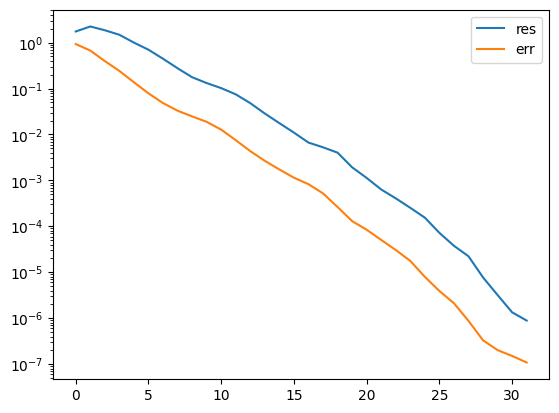

In [10]:
fig = plt.subplots()
plt.plot(res_gc, label="res")
plt.plot(err_gc, label="err")
plt.yscale('log')

plt.legend()
plt.show()



temps de calcul des methodes

In [11]:
import time

In [12]:
#temps de calcul avec le module time
deb_gc = time.time()
gradient_conjugue(B,b, xexac)
fin_gc = time.time()
time_gc = fin_gc - deb_gc
print("temps de calcul avec le gradient conjugué : ", time_gc)

deb_gmres = time.time()
gmres(B,b, xexac)
fin_gmres = time.time()
time_gmres = fin_gmres - deb_gmres
print("temps de calcul avec le gmres : ", time_gmres)

## comparaison des temps de calcul
diff = round(time_gmres / time_gc, 2)
print("le temps de calcul avec le gradient conjugué est ", diff, " fois plus rapide que le temps de calcul avec le gmres")


temps de calcul avec le gradient conjugué :  0.007842302322387695
temps de calcul avec le gmres :  0.21651005744934082
le temps de calcul avec le gradient conjugué est  27.61  fois plus rapide que le temps de calcul avec le gmres


Il est observé que la méthode du Gradient Conjugé est plus rapide que celle de GMRES. Ces deux méthodes sont particulièrement adaptées aux matrices creuses, car elles effectuent uniquement des produits matrice-vecteur avec les vecteurs non nuls de la matrice. Cette approche permet de réduire le temps de calcul en évitant les opérations inutiles.

## Partie 3: (Preconditionnement)

### Question 7: 
Appliquons la methode GMRES aux matrices
`C = np.diag(2+np.arange(n)) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)` et comparons les resultats avec la systeme preconditionne $M^{-1}Cx = M^{-1}b$  ou $M$ est la matrice diagonale de $C$ (preconditionnement diagonal ou Jacobi).
Affichons egalememnt les preconditionnement $C$ et $M^{-1}C$.



In [13]:
n = 10
C = np.diag(2 + np.arange(n)) - np.diag(np.ones(n-1), 1) - np.diag(np.ones(n-1), -1)
b = np.random.rand(n)

print("C = \n", C[:5, :5], "\n") # on affiche juste les 5 premières lignes et colonnes
print("b = \n", b[:5], "\n") # on affiche juste les 5 premières colonnes

C = 
 [[ 2. -1.  0.  0.  0.]
 [-1.  3. -1.  0.  0.]
 [ 0. -1.  4. -1.  0.]
 [ 0.  0. -1.  5. -1.]
 [ 0.  0.  0. -1.  6.]] 

b = 
 [0.80324689 0.47086316 0.80728283 0.06443178 0.89023603] 



In [14]:
x_exact = np.linalg.solve(C, b)
x0, err_gmres0, res_gmres0 = gmres(C, b, x_exact)

Matrice = np.diag(C)
M = np.diag(Matrice)
M_inv = np.diag(1/Matrice)
M1 = M_inv@C
M2 = M_inv@b
x1, err_gmres1, res_gmres1 = gmres(M1, M2, x_exact)

cond1 = np.linalg.cond(C)
cond2 = np.linalg.cond(M1)


##affichage des résultats; on ne garde que les 5 premiers termes
print("solution exacte : \n", x_exact[:5])
print()
print("solution avec GMRES pour C : \n", x0[:5])
print()
print("solution avec GMRES pour M_inv@C : \n", x1[:5])
print()
print("Affichage des conditionnnements : \n")
print("conditionnement de C : ", cond1)
print()
print("conditionnement de M_inv@C : ", cond2)


solution exacte : 
 [0.64716171 0.49107652 0.3552047  0.12245945 0.19266078]

solution avec GMRES pour C : 
 [0.64716171 0.49107652 0.3552047  0.12245945 0.19266078]

solution avec GMRES pour M_inv@C : 
 [0.64716171 0.49107652 0.3552047  0.12245945 0.19266078]

Affichage des conditionnnements : 

conditionnement de C :  9.368431716246857

conditionnement de M_inv@C :  3.240985164049483


#### Comparons les temps de calculs pour les deux matrices $C$ et $M^{-1}C$.

In [15]:
deb_C = time.time()
gmres(C, b, x_exact)
fin_C = time.time()
tmp_C = fin_C - deb_C
print("Temps d'exécution de la fonction gmres pour la matrice C : ", tmp_C)

deb_InvMC = time.time()
gmres(M1, b, x_exact)
fin_InvMC = time.time()
tmp_InvMC = fin_InvMC - deb_InvMC
print("Temps d'exécution de la fonction gmres pour la matrice InvMC : ", tmp_InvMC)



Temps d'exécution de la fonction gmres pour la matrice C :  0.008961915969848633
Temps d'exécution de la fonction gmres pour la matrice InvMC :  0.013847112655639648


In [16]:
## comparaison des temps de calculs pour les matrices C et InvM@C
difff = round (tmp_C / tmp_InvMC, 2)
print("La methode gmres pour la matrice InvMC est ", difff, " fois plus rapide que la methode gmres pour la matrice C")

La methode gmres pour la matrice InvMC est  0.65  fois plus rapide que la methode gmres pour la matrice C


### Commentaire:
On remarque qu'avec la matrice $M^{-1}C$, la methode gmres prends moins de temps (il est plus rapide)) qu'avec la matrice $C$. On peut en deduire que le preconditionment diagonal est efficace; il permet de gagner du temps de calcul.

### Question 8:
On reprends la question precedente avc la matrice `D = np.diag(2 + ones(n)) - np.diag(ones(n-1),1) - np.diag(ones(n-1),-1)`

Comparons les resultats avec le systeme precodionne $M^{-1}Dx = M^{-1}b$ ou $M$ est la partie diagonale de $D$ et affichons le conditionnement des matrices $D$ et $M^{-1}D$.

In [17]:
D = np.diag(2*np.ones(n)) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
print("D = \n", D[:5,:5], "\n...")

D = 
 [[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]] 
...


In [18]:
xexact = np.linalg.solve(D, b)
x_D, err_gmresD, res_gmresD = gmres(D, b, x_exact)

MatriceD = np.diag(D)
M = np.diag(MatriceD)
M_inv = np.diag(1/MatriceD)
MD = M_inv@D
M2 = M_inv@b ## ne change pas
x2, err_gmres2, res_gmres2 = gmres(MD, M2, x_exact)

cond3 = np.linalg.cond(D)
cond4 = np.linalg.cond(MD)


##affichage des résultats; on ne garde que les 5 premiers termes
print("solution exacte : \n", x_exact[:5])
print()
print("solution avec GMRES pour D : \n", x_D[:5])
print()
print("solution avec GMRES pour M_inv@C : \n", x2[:5])
print()
print("Affichage des conditionnnements : \n")
print("conditionnement de D : ", cond3)
print()
print("conditionnement de M_inv@D : ", cond4)


solution exacte : 
 [0.64716171 0.49107652 0.3552047  0.12245945 0.19266078]

solution avec GMRES pour D : 
 [3.11483186 5.42641683 7.26713863 8.30057761 9.2695848 ]

solution avec GMRES pour M_inv@C : 
 [3.11483186 5.42641683 7.26713863 8.30057761 9.2695848 ]

Affichage des conditionnnements : 

conditionnement de D :  48.37415007870822

conditionnement de M_inv@D :  48.37415007870822


Comparons les temps de Calculs pour ls matrice $D$ et $M^{-1}D$

In [19]:
deb_D = time.time()
gmres(D, b, x_exact)
fin_D = time.time()
tmp_D = fin_D - deb_D
print("Temps d'exécution de la fonction gmres pour la matrice C : ", tmp_D)

deb_InvMD = time.time()
gmres(MD, b, x_exact)
fin_InvMD = time.time()
tmp_InvMD = fin_InvMD - deb_InvMD
print("Temps d'exécution de la fonction gmres pour la matrice InvMC : ", tmp_InvMD)

Temps d'exécution de la fonction gmres pour la matrice C :  0.023543119430541992
Temps d'exécution de la fonction gmres pour la matrice InvMC :  0.030974864959716797


In [20]:
## comparaison des temps de calcul pour les matrices D et InvM@D
diffff =round(tmp_D/tmp_InvMD,2)
print("Le temps de calcul de la matrice InvM@D est", diffff, "fois plus rapide que le temps de calcul de la matrice D")

Le temps de calcul de la matrice InvM@D est 0.76 fois plus rapide que le temps de calcul de la matrice D


### Commentaire:
On remarque qu'avec la matrice $M^{-1}D$, la methode gmres prends moins de temps (il est plus rapide) qu'avec la matrice $D$.

On peut en deduire que le preconditionment diagonal est efficace; il permet de gagner du temps de calcul.## Commentaire:
Avec la matrice

### Question  9:
Programmons une fonction `gradient_conjugue_precond(A, b, M, xexact)` qui renvoie la solution $x$ du systeme lineaire obtenue par l'algorithme du gradient conjugue preconditionne, ainsi que la liste dees erreurs relatives et la liste de la norme des residus( relatifs)


In [21]:
def gradient_conjugue_precond(AA, BB, M, xexact):    
    A = AA.copy()    
    b = BB.copy()  
    n = A.shape[0]
         
    x_gcp = np.zeros(n)     
    r_precond = b - A @ x_gcp 
    z_precond = M.solve(r_precond)     
    dp = z_precond.copy()   
    
    resnorm0 = np.linalg.norm(b)    
    resnorm = 1    

    res_gcp = []    
    err_gcp=[]
        
    tolerance = 1e-6    
    it_max = 1000    
    it = 0    

    while resnorm > tolerance and it < it_max:        
        sp = (r_precond @ z_precond) / (dp @ A @ dp)        
        x_gcp += sp * dp  

        r = r_precond.copy()        
        r_precond -= sp * A @ dp     

        z = z_precond.copy()        
        zp = M.solve(r_precond)     

        bp = (r_precond @ z_precond)/(r @ z)        
        dp = z_precond + bp * dp   
            
        it += 1  

        err = np.linalg.norm(xexact - x_gcp)/np.linalg.norm(xexact)        
        err_gcp.append(err)  

        resnorm = np.linalg.norm(b - A @ x_gcp)/resnorm0        
        res_gcp.append(resnorm)    
    
    return x_gcp, err_gcp, res_gcp

    

### Question 10:
Testons la foncion `gradient_conjugue_precond` sur la matrice $B$ de la `question 6`, en utilisant comme matrice de preconditionement la factorisation $LU$ incomplete donnee par `spsplin.spilu`.

In [22]:
d = 25 ## 25, 50, 100
n= d*d
B = spsp.diags([[4]*n,[-1]*(n-1),[-1]*(n-1),[-1]*(n-d),[-1]*(n-d)],[0,1,-1,d,-d])
b = np.random.rand(n)

# la solution exacte
xexact = np.linalg.solve(B.toarray(),b)

#la matrice  de preconditionnement M
M = spsplin.spilu(B.tocsc())

## la solution par la methode du gradient conjugue
X_gc, Err_gc, Res_gc = gradient_conjugue(B, b, xexact)

## la solution par la methode du gcp
X_gcp, Err_gcp, Res_gcp = gradient_conjugue_precond(B, b, M, xexact)

## Affichage des resultats: seul les 5 premiers elements sont affiches pour des raisons de lisibilite
print("\n Solution exacte = \n ", xexact[:5])
print("---------------------------------------------------------------")
print(" Methode du gradient conjugué: \n")
print("Solution approchée avec la méthode gradient conjugué = \n", X_gc[:5])
print ()
print("Erreur relative = \n", Err_gc[:5])
print ()
print("Résidu = \n", Res_gc[:5])
print("---------------------------------------------------------------")
print(" Methode du gradient conjugué préconditionné: \n")
print("Solution approchée avec la méthode gradient conjugué préconditionné = \n", X_gcp[:5])
print ()
print("Erreur relative = \n", Err_gcp[:5])
print ()
print("Résidu = \n", Res_gcp[:5])


 Solution exacte = 
  [3.90119833 5.13682773 5.64958573 5.92944679 6.01716952]
---------------------------------------------------------------
 Methode du gradient conjugué: 

Solution approchée avec la méthode gradient conjugué = 
 [3.90119847 5.13682821 5.6495864  5.92944743 6.01717029]

Erreur relative = 
 [0.9851353948225422, 0.9110712237539605, 0.7915520463640305, 0.6740376561246747, 0.5733149952539306]

Résidu = 
 [1.952946587233478, 3.3645126896991866, 3.469834885935301, 3.2995896429440403, 2.9996361284266424]
---------------------------------------------------------------
 Methode du gradient conjugué préconditionné: 

Solution approchée avec la méthode gradient conjugué préconditionné = 
 [3.89836775 5.13356774 5.64627808 5.92578961 6.01257863]

Erreur relative = 
 [0.00042132427815549554, 0.0004213242781553167, 0.0004213242781553167, 0.0004213242781553167, 0.0004213242781553167]

Résidu = 
 [0.02791068295107164, 0.027910682951070603, 0.027910682951070603, 0.02791068295107060

Comparons les temps de calculs des deux méthodes gradient conjugue et gradiant conjugue oreconditionne

In [23]:
## temps de calcul avec la methode du gradient conjugue:
debGC = time.time()
gradient_conjugue(B, b, xexact)
finGC = time.time()
tmpsGC = finGC - debGC


## temps de calcul avec la methode du gradient conjugue preconditionne:
debGCP = time.time()
gradient_conjugue_precond(B, b, M, xexact)
finGCP = time.time()
tmpsGCP = finGCP - debGCP

#comparaion
difference = round(tmpsGC/tmpsGCP, 2)

#affichage des temps de calcul et comparaison
print("temps de calcul avec la methode du gradient conjugue: ", tmpsGC)
print("temps de calcul avec la methode du gradient conjugue preconditionne: ", tmpsGCP)
print("le temps de calcul avec la methode du gradient conjugue preconditionne est ", difference, " fois plus rapide que celui avec la methode du gradient conjugue")





temps de calcul avec la methode du gradient conjugue:  0.017995357513427734
temps de calcul avec la methode du gradient conjugue preconditionne:  1.079463005065918
le temps de calcul avec la methode du gradient conjugue preconditionne est  0.02  fois plus rapide que celui avec la methode du gradient conjugue
